# Pre-Analsis Honey Production Data

## 1. What states have the highest production value (price per lb)?

## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pylab import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')

## Read in Data

In [28]:
honey_production = pd.read_csv(r"C:\Users\sdstc\Documents\GitHub\FinalProjectEntity\Data\honeyproduction.csv")

In [22]:
honey_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [23]:
honey_production.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


## Display the mean or average of production value of honey for each state

In [38]:
honey_production[['state', 'prodvalue', 'priceperlb']].groupby('state').mean().round()

,prodvalue,priceperlb
state,,
AL,1001933.0,1.0
AR,2684400.0,1.0
AZ,2111800.0,1.0
CA,24359333.0,1.0
CO,2090267.0,1.0
FL,16615267.0,1.0
GA,3867533.0,1.0
HI,1404200.0,2.0
IA,2588333.0,1.0


## Display which state holds the highest production value

In [39]:
honey_production[honey_production['prodvalue'] == honey_production['prodvalue'].max()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
532,ND,510000.0,91,46410000.0,12995000.0,1.5,69615000.0,2010


### According to results, North Dakota boasts the highest production value as of 2010.

## Display which state holds the highest price per lb

In [61]:
honey_production[honey_production['priceperlb'] == honey_production['priceperlb'].max()]

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
593,HI,10000.0,75,750000.0,263000.0,4.15,3113000.0,2012


### According to these results, Hawaii holds the highest priceperlb in the year 2012.

## Display which states hold the highest production value

In [48]:
states = honey_production['prodvalue'].groupby(by=honey_production['state'], axis=0, sort=False).sum().sort_values(ascending=False)
states.head()

state
ND    545642000.0
CA    365390000.0
SD    290651000.0
FL    249229000.0
MT    176903000.0
Name: prodvalue, dtype: float64

### North Dakota, California, South Dakota, Florida, and Montana hold the highest production values

## Display which states hold the highest price per lb

In [58]:
states1 = honey_production['priceperlb'].groupby(by=honey_production['state'], axis=0, sort=False).sum().sort_values(ascending=False)
states1.head()

state
VA    34.80
IL    32.09
KY    31.24
NC    31.11
TN    28.41
Name: priceperlb, dtype: float64

### Virginia, Illinois, Kentucky, North Carolina, and Tennessee hold the highest price per lb

## Create a heatmaps displaying the Price Per Pound and Production Value of the top

In [59]:
cor = honey_production[['priceperlb','prodvalue']].corr()
cor

,priceperlb,prodvalue
priceperlb,1.000000,-0.089567
prodvalue,-0.089567,1.000000


In [65]:
corr = honey_production.corr()
corr

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796,0.008709
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977,-0.232092
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236,-0.055556
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560,-0.119602
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567,0.693984
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000,0.139451
year,0.008709,-0.232092,-0.055556,-0.119602,0.693984,0.139451,1.000000


<AxesSubplot:>

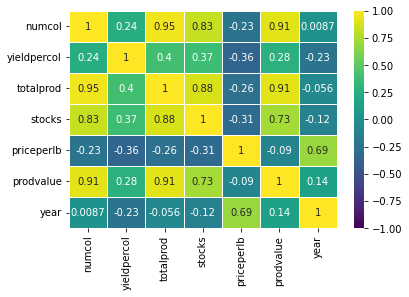

In [67]:
sns.heatmap(corr,annot = True, cmap='viridis',vmin=-1,vmax=1, linewidth = 1)

### This heat map displays how correlated each variable is with one another using numbers between -1 and 1, as well as a color scheme--the darker it is, the less correlation there is between variables, whereas the lighter it is, the more correlation there is between variables.

<AxesSubplot:>

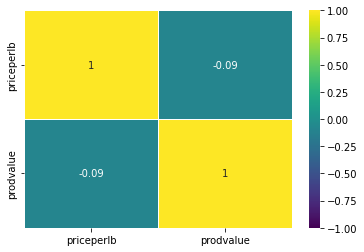

In [60]:
sns.heatmap(cor,annot = True,cmap='viridis',vmin=-1,vmax=1,linewidth =1)

### According to this heatmap of two variables, production value and pricer per lb--pricerperlb has a direct correlation with itself, but none, if not, a negative correlation with production value.